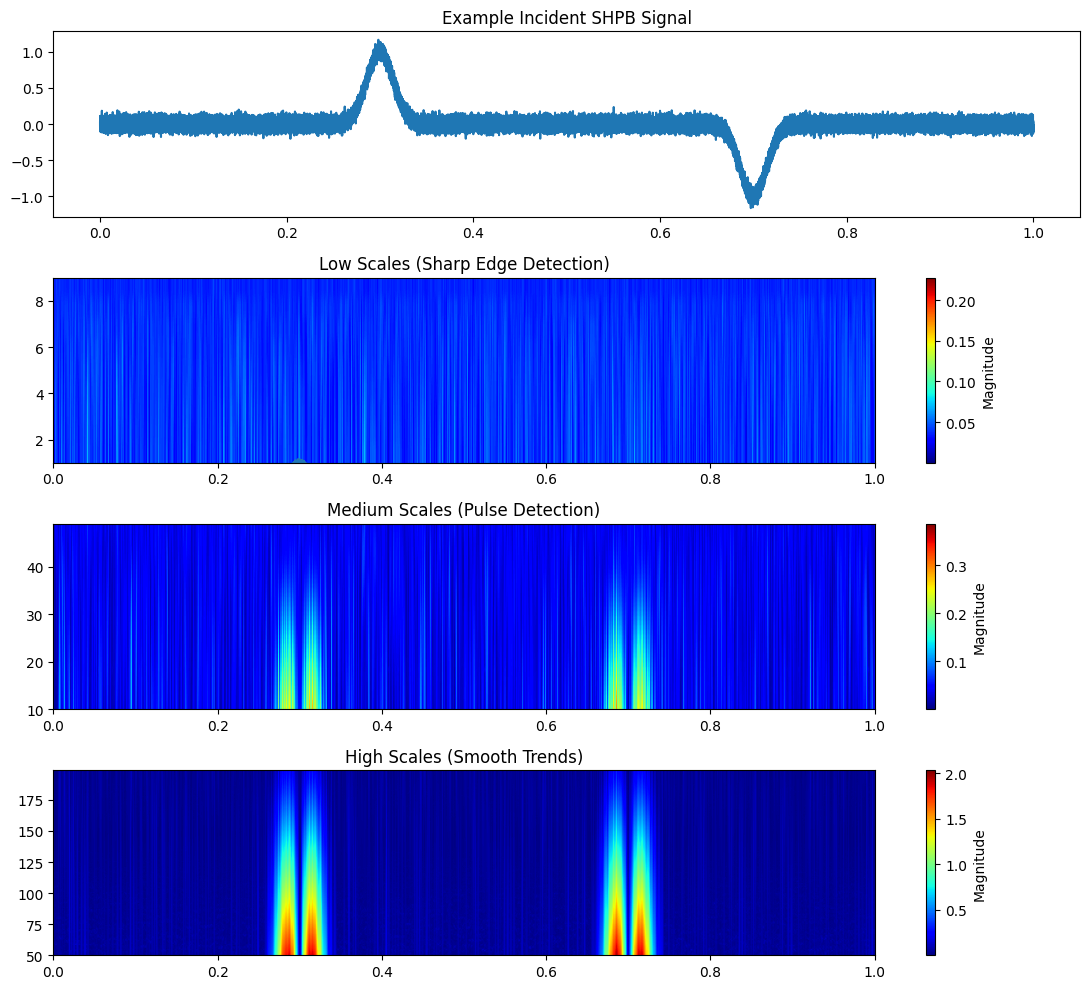

In [3]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Simulated SHPB signal with sharp pulse edges
time = np.linspace(0, 1, 100000)  # 1-second signal
pulse = np.exp(-((time - 0.3) / 0.02) ** 2) - np.exp(-((time - 0.7) / 0.02) ** 2)
noise = 0.05 * np.random.randn(len(time))
signal_data = pulse + noise  # Simulated SHPB strain signal

# Define different scale ranges
scales_low = np.arange(1, 10)    # High-frequency, edge detection
scales_med = np.arange(10, 50)   # Pulse detection
scales_high = np.arange(50, 200) # Large-scale trends

# Apply CWT with different scales
wavelet = 'gaus1'  # First derivative of Gaussian
coeffs_low, _ = pywt.cwt(signal_data, scales_low, wavelet)
coeffs_med, _ = pywt.cwt(signal_data, scales_med, wavelet)
coeffs_high, _ = pywt.cwt(signal_data, scales_high, wavelet)

# Visualize how scale affects wavelet response
plt.figure(figsize=(11, 10))

plt.subplot(4, 1, 1)
plt.plot(time, signal_data, label="SHPB Signal")
plt.title("Example Incident SHPB Signal")

plt.subplot(4, 1, 2)
plt.plot(time, signal_data, label="SHPB Signal")
plt.imshow(np.abs(coeffs_low), aspect='auto', extent=[time[0], time[-1], scales_low.min(), scales_low.max()], cmap='jet')
plt.colorbar(label="Magnitude")
plt.title("Low Scales (Sharp Edge Detection)")

plt.subplot(4, 1, 3)
plt.plot(time, signal_data, label="SHPB Signal")
plt.imshow(np.abs(coeffs_med), aspect='auto', extent=[time[0], time[-1], scales_med.min(), scales_med.max()], cmap='jet')
plt.colorbar(label="Magnitude")
plt.title("Medium Scales (Pulse Detection)")

plt.subplot(4, 1, 4)
plt.plot(time, signal_data, label="SHPB Signal")
plt.imshow(np.abs(coeffs_high), aspect='auto', extent=[time[0], time[-1], scales_high.min(), scales_high.max()], cmap='jet')
plt.colorbar(label="Magnitude")
plt.title("High Scales (Smooth Trends)")

plt.tight_layout()
plt.show()
